# PROYECTO: LA CALIDAD DEL AIRE EN PUEBLA
## CÓDIGO DEL ANÁLISIS

In [185]:
#Importar librerías:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gdown 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import plotly.express as px

In [186]:
# URL cruda del archivo CSV en GitHub
url = "https://raw.githubusercontent.com/DAGA-Mx/CALIDAD-DEL-AIRE-EN-PUEBLA-ANALISIS/main/df_limpio_AIRE_DILAN.csv"

# Leer el archivo CSV directamente desde la URL
df = pd.read_csv(url)

# Imprimir las primeras filas del DataFrame
print(df.head())


                                        Estacion Agrupacion Fecha inicial  \
0  BINE : Benemerito Instituto Normal del Estado     2016-6    01/06/2016   
1  BINE : Benemerito Instituto Normal del Estado     2016-7    01/07/2016   
2  BINE : Benemerito Instituto Normal del Estado     2016-8    01/08/2016   
3  BINE : Benemerito Instituto Normal del Estado     2016-9    01/09/2016   
4  BINE : Benemerito Instituto Normal del Estado    2016-10    01/10/2016   

  Fecha final Parametro  Dias buenos  Dias aceptables  Dias malos  \
0  30/06/2016       SO2            2                0           0   
1  31/07/2016       SO2           31                0           0   
2  31/08/2016       SO2           31                0           0   
3  30/09/2016       SO2           30                0           0   
4  31/10/2016       SO2           31                0           0   

   Dias muy malos  Dias extremadamente malos  Dias insuficientes  
0               0                          0           

### ANÁLISIS DE PRIMERA INSTANCIA
### Observamos las características del dataframe

In [187]:
print(df.head()) # Muestra las primeras 5 filas
print(df.info()) # Muestra el resumen del DataFrame (columnas, tipos de datos, valores no nulos)
print(df.shape) # Muestra el número de filas y columnas

                                        Estacion Agrupacion Fecha inicial  \
0  BINE : Benemerito Instituto Normal del Estado     2016-6    01/06/2016   
1  BINE : Benemerito Instituto Normal del Estado     2016-7    01/07/2016   
2  BINE : Benemerito Instituto Normal del Estado     2016-8    01/08/2016   
3  BINE : Benemerito Instituto Normal del Estado     2016-9    01/09/2016   
4  BINE : Benemerito Instituto Normal del Estado    2016-10    01/10/2016   

  Fecha final Parametro  Dias buenos  Dias aceptables  Dias malos  \
0  30/06/2016       SO2            2                0           0   
1  31/07/2016       SO2           31                0           0   
2  31/08/2016       SO2           31                0           0   
3  30/09/2016       SO2           30                0           0   
4  31/10/2016       SO2           31                0           0   

   Dias muy malos  Dias extremadamente malos  Dias insuficientes  
0               0                          0           

In [188]:
df

,Estacion,Agrupacion,Fecha inicial,Fecha final,Parametro,Dias buenos,Dias aceptables,Dias malos,Dias muy malos,Dias extremadamente malos,Dias insuficientes
0,BINE : Benemerito Instituto Normal del Estado,2016-6,01/06/2016,30/06/2016,SO2,2,0,0,0,0,28
1,BINE : Benemerito Instituto Normal del Estado,2016-7,01/07/2016,31/07/2016,SO2,31,0,0,0,0,0
2,BINE : Benemerito Instituto Normal del Estado,2016-8,01/08/2016,31/08/2016,SO2,31,0,0,0,0,0
3,BINE : Benemerito Instituto Normal del Estado,2016-9,01/09/2016,30/09/2016,SO2,30,0,0,0,0,0
4,BINE : Benemerito Instituto Normal del Estado,2016-10,01/10/2016,31/10/2016,SO2,31,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2239,NIN : Las Ninfas,2022-7,01/07/2022,31/07/2022,SO2,31,0,0,0,0,0
2240,STA : Agua Santa,2022-5,01/05/2022,31/05/2022,NO2,31,0,0,1,0,0
2241,BINE : Benemerito Instituto Normal del Estado,2022-8,01/08/2022,31/08/2022,NO2,21,1,0,0,0,9
2242,Agregado,2020-12,01/12/2020,31/12/2020,O3,26,18,13,1,0,0


In [189]:
df.columns

Index(['Estacion', 'Agrupacion', 'Fecha inicial', 'Fecha final', 'Parametro',
       'Dias buenos', 'Dias aceptables', 'Dias malos', 'Dias muy malos',
       'Dias extremadamente malos', 'Dias insuficientes'],
      dtype='object')

In [190]:
# Mostramos los valores únicos de la columna, para identificar las estaciones meteorológicas del estado.
df['Estacion'].unique()

array(['BINE : Benemerito Instituto Normal del Estado',
       'NIN : Las Ninfas', 'STA : Agua Santa',
       'UTP : Universidad Tecnologica de Puebla', 'VEL : Velodromo',
       'Agregado'], dtype=object)

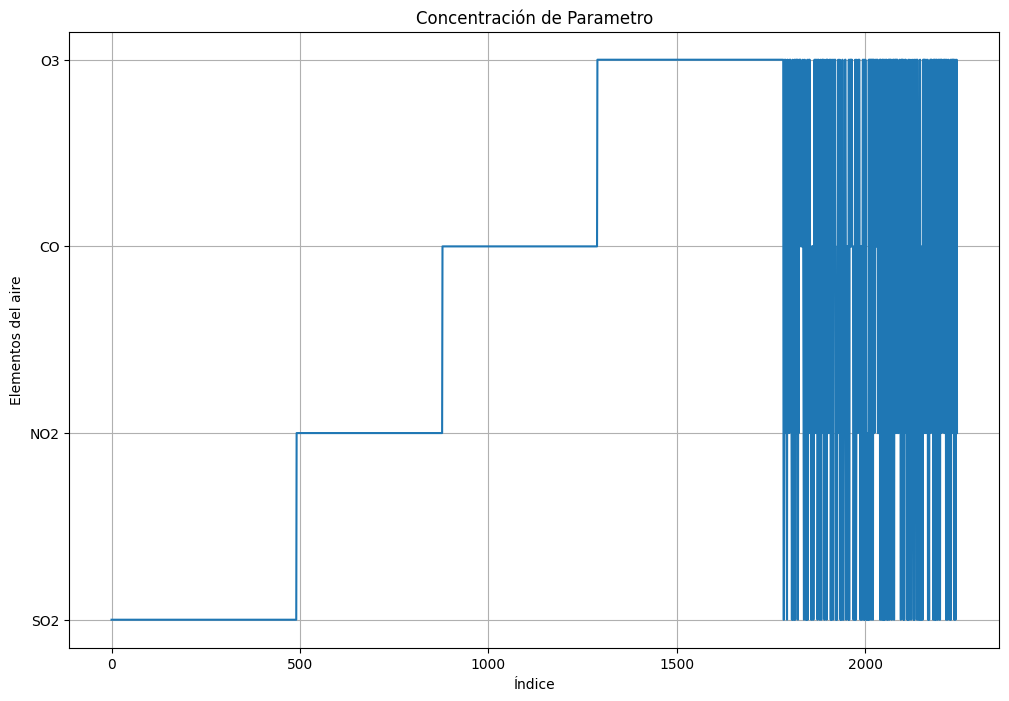

In [191]:
# Iniciamos con la gráfica de las estaciones.

plt.figure(figsize=(12,8))
plt.plot(df['Parametro'])
plt.title('Concentración de Parametro')
plt.xlabel('Índice')
plt.ylabel('Elementos del aire')
plt.grid(True)
plt.show()


In [192]:
print(df.columns.tolist())

['Estacion', 'Agrupacion', 'Fecha inicial', 'Fecha final', 'Parametro', 'Dias buenos', 'Dias aceptables', 'Dias malos', 'Dias muy malos', 'Dias extremadamente malos', 'Dias insuficientes']


In [193]:
# Corrección del código para asegurar el formato Día/Mes/Año
# Usa `%d` para el día, `%m` para el mes y `%Y` para el año completo (2016, 2017, etc.)

df['Fecha inicial'] = pd.to_datetime(df['Fecha inicial'], format='%d/%m/%Y')
df['Fecha final'] = pd.to_datetime(df['Fecha final'], format='%d/%m/%Y')

# Confirma que el tipo de dato ha cambiado
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2244 entries, 0 to 2243
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Estacion                   2244 non-null   object        
 1   Agrupacion                 2244 non-null   object        
 2   Fecha inicial              2244 non-null   datetime64[ns]
 3   Fecha final                2244 non-null   datetime64[ns]
 4   Parametro                  2244 non-null   object        
 5   Dias buenos                2244 non-null   int64         
 6   Dias aceptables            2244 non-null   int64         
 7   Dias malos                 2244 non-null   int64         
 8   Dias muy malos             2244 non-null   int64         
 9   Dias extremadamente malos  2244 non-null   int64         
 10  Dias insuficientes         2244 non-null   int64         
dtypes: datetime64[ns](2), int64(6), object(3)
memory usage: 193.0+ KB
Non

## 1. Implementación de Métricas Clave
### Primero, se implementarán las métricas que permitirán cuantificar el impacto de los días de mala calidad.

### Código de Preparación y Métricas

In [194]:
# 1. Filtrar la estación 'Agregado' para análisis detallado
df_analisis = df[df['Estacion'] != 'Agregado'].copy()

# 2. Crear una Métrica de Riesgo Ponderado
# (Le damos mayor peso a los días de peor calidad para cuantificar el riesgo)
df_analisis['Riesgo Ponderado'] = (
    1 * df_analisis['Dias aceptables'] +
    2 * df_analisis['Dias malos'] +
    3 * df_analisis['Dias muy malos'] +
    4 * df_analisis['Dias extremadamente malos']
)

# 3. Crear una Métrica Simple de Días de Riesgo
# (Suma directa de los peores días)
df_analisis['Total Dias Malos'] = (
    df_analisis['Dias malos'] +
    df_analisis['Dias muy malos'] +
    df_analisis['Dias extremadamente malos']
)


## 2. Análisis Central: Tendencia Anual (2016-2022)
### Este es el primer gráfico crucial. Nos indicará el panorama general de cómo ha evolucionado el riesgo en la ciudad para cada contaminante a lo largo de los siete años.

## Visualización 1: Riesgo Ponderado Anual por Contaminante
### Utilizaremos Plotly Express para un gráfico interactivo, lo que es ideal en Jupyter Notebook.

In [195]:
# --- PASO 1: AGREGACIÓN DE DATOS ANUALES ---

# 1. Agrupar los datos del DataFrame de análisis (df_analisis) por:
#    a) El año extraído de la columna 'Fecha inicial' (.dt.year).
#    b) El contaminante ('Parametro').
# 2. Sumar el 'Riesgo Ponderado' (nuestra métrica de riesgo calculada previamente) para ese año/parámetro.
# 3. Usar .reset_index() para convertir las columnas de agrupación en columnas normales del DataFrame.
df_tendencia_anual = df_analisis.groupby(
    [df_analisis['Fecha inicial'].dt.year, 'Parametro']
)['Riesgo Ponderado'].sum().reset_index()

# 4. Asignar nombres claros a las nuevas columnas para facilitar la lectura y el uso.
df_tendencia_anual.columns = ['Año', 'Parametro', 'Riesgo Ponderado Total']


# --- PASO 2: SOLUCIÓN DE TIPO DE DATOS PARA PLOTLY ---

# Plotly Express a veces es estricto con los tipos de datos en la forma 'wide-form'.
# Aseguramos que los tipos sean consistentes para evitar el error 'ValueError'.
# Convertimos explícitamente a los tipos más seguros para la visualización:

# Aseguramos que 'Año' sea un número entero (int)
df_tendencia_anual['Año'] = df_tendencia_anual['Año'].astype(int)

# Aseguramos que la métrica 'y' sea un número flotante (float)
df_tendencia_anual['Riesgo Ponderado Total'] = df_tendencia_anual['Riesgo Ponderado Total'].astype(float)

# Aseguramos que la columna 'color' sea una cadena de texto (str)
df_tendencia_anual['Parametro'] = df_tendencia_anual['Parametro'].astype(str)


# --- PASO 3: VISUALIZACIÓN INTERACTIVA CON PLOTLY ---

# 1. Creamos un sub-DataFrame con solo las columnas necesarias, como doble chequeo.
df_plot = df_tendencia_anual[['Año', 'Parametro', 'Riesgo Ponderado Total']]

# 2. Generamos el gráfico de líneas (px.line):
#    - Eje X: 'Año'
#    - Eje Y: 'Riesgo Ponderado Total'
#    - Color: Líneas separadas para cada 'Parametro' (contaminante)
fig = px.line(
    df_plot,
    x='Año',
    y='Riesgo Ponderado Total',
    color='Parametro',
    title='Tendencia Anual del Riesgo de Calidad del Aire en Puebla (2016-2022)',
    labels={'Riesgo Ponderado Total': 'Riesgo Ponderado Acumulado', 'Año': 'Año de Monitoreo'} # Etiquetas claras
)

# 3. Ajustes visuales de la interfaz de Plotly:
#    - tickmode = 'linear' asegura que todos los años (2016, 2017, etc.) se muestren en el eje X.
#    - hovermode='x unified' permite ver todos los valores de las líneas al pasar el ratón por un solo punto X.
fig.update_layout(
    xaxis = dict(tickmode = 'linear'),
    hovermode='x unified'
)

# Mostramos el gráfico interactivo
fig.show()

In [196]:
print(df_tendencia_anual.dtypes)

Año                         int64
Parametro                  object
Riesgo Ponderado Total    float64
dtype: object


### Interpretación de la Tendencia Anual

#### El resultado que describe indica que, en términos de Riesgo Ponderado Acumulado (la suma de días de mala calidad ponderada), la situación es la siguiente:
$\text{O}_3$ (Ozono) es, con diferencia, el contaminante que genera el mayor riesgo total en Puebla entre 2016 y 2022. Esto es común en ciudades con mucha radiación solar y tráfico vehicular, ya que el Ozono se forma por reacciones fotoquímicas.

$\text{SO}_2$ (Dióxido de Azufre) genera el menor riesgo total. Esto sugiere que las fuentes principales de $\text{SO}_2$ (generalmente industriales o por quema de combustibles fósiles con alto contenido de azufre) están bien controladas o no son predominantes en la contaminación de Puebla.

## Pregunta Clave para el Análisis Avanzado
### Ahora que sabemos que el Ozono ($\text{O}_3$) es el contaminante dominante, la siguiente fase debe centrarse en:¿Dónde ocurre el riesgo? (Análisis por Estación).¿Cuándo ocurre el riesgo? (Análisis de Estacionalidad).

#### 4. Análisis por Estación: ¿Dónde está el Riesgo? 

#### Vamos a utilizar la métrica de Total Dias Malos para identificar qué estaciones registran la peor calidad del aire, prestando especial atención al contaminante $\text{O}_3$.

## Visualización 2: Distribución de Días Malos por Estación y Contaminante

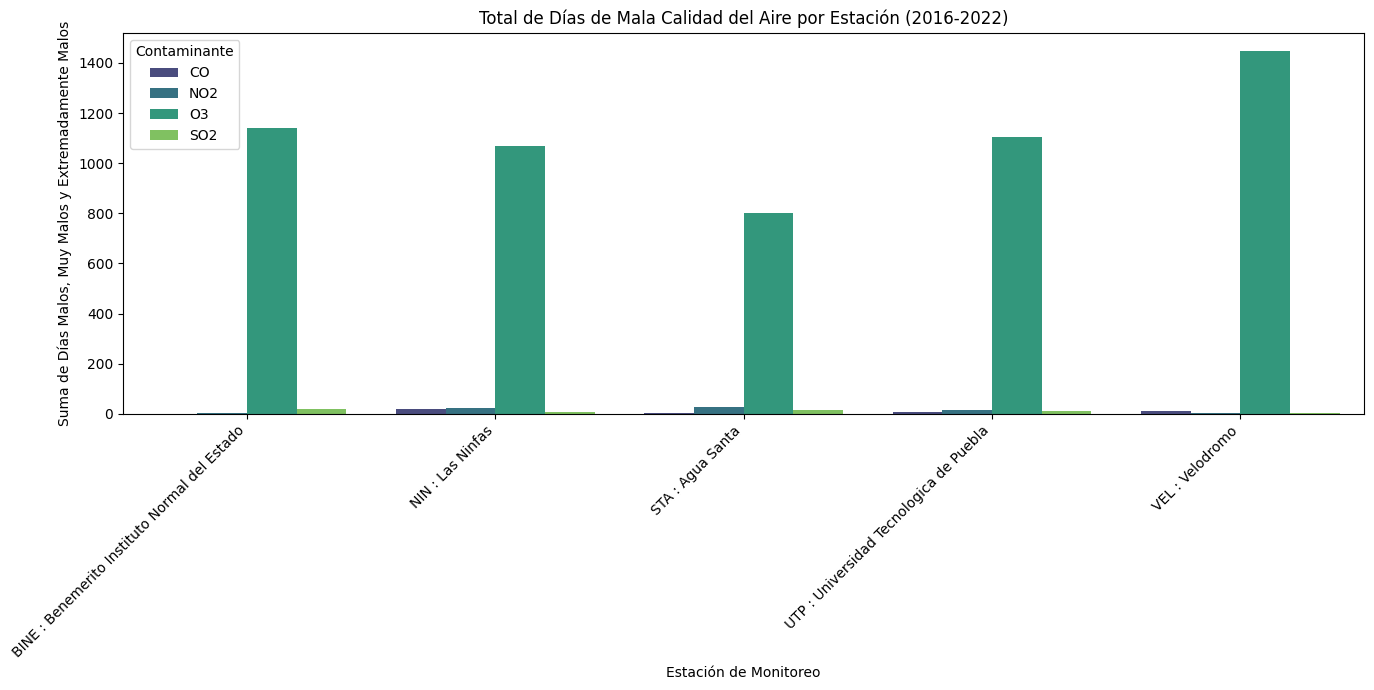

In [197]:
# 1. Agrupar y sumar el 'Total Dias Malos' por Estación y por Contaminante
# Nota: La columna 'Total Dias Malos' se creó al inicio del análisis.
df_estacion_riesgo = df_analisis.groupby(['Estacion', 'Parametro'])['Total Dias Malos'].sum().reset_index()

# 2. Visualización con Gráfico de Barras Agrupadas (Seaborn)
plt.figure(figsize=(14, 7))
sns.barplot(
    data=df_estacion_riesgo,
    x='Estacion',
    y='Total Dias Malos',
    hue='Parametro', # Separa las barras por contaminante
    palette='viridis' # Esquema de colores
)
plt.title('Total de Días de Mala Calidad del Aire por Estación (2016-2022)')
plt.xlabel('Estación de Monitoreo')
plt.ylabel('Suma de Días Malos, Muy Malos y Extremadamente Malos')
plt.xticks(rotation=45, ha='right') # Rota las etiquetas del eje X para mejor lectura
plt.legend(title='Contaminante')
plt.tight_layout() # Ajusta automáticamente el gráfico
plt.show()

#### 5. Análisis de Estacionalidad: ¿Cuándo Ocurre el Riesgo? 
#### La contaminación por Ozono ($\text{O}_3$) es típicamente un fenómeno de la temporada seca y cálida (marzo a mayo) en México. Vamos a verificar esta hipótesis.

In [198]:
# Preparación: Extracción del Mes

# Extraemos el número del mes (1=Enero, 12=Diciembre)
df_analisis['Mes'] = df_analisis['Fecha inicial'].dt.month

# Agrupamos el riesgo (media) por mes y contaminante
df_estacional = df_analisis.groupby(['Mes', 'Parametro'])['Riesgo Ponderado'].mean().reset_index()

## Visualización 3: Ciclo Anual de Riesgo por Contaminante

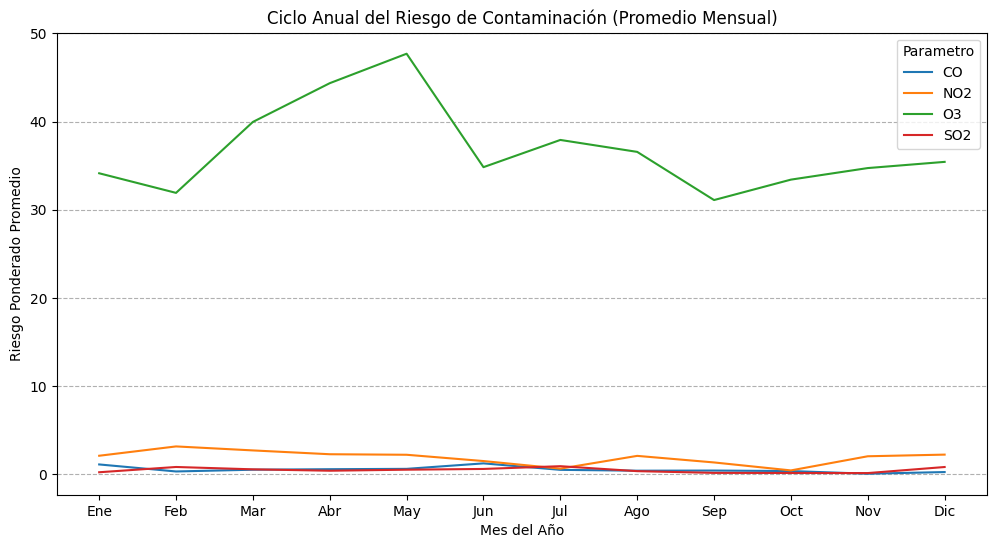

In [199]:
# Gráfico de líneas (usando Seaborn) para ver el ciclo anual
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=df_estacional,
    x='Mes',
    y='Riesgo Ponderado',
    hue='Parametro',
    dashes=False
)
plt.title('Ciclo Anual del Riesgo de Contaminación (Promedio Mensual)')
plt.xlabel('Mes del Año')
plt.ylabel('Riesgo Ponderado Promedio')
plt.xticks(ticks=range(1, 13), labels=['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.grid(axis='y', linestyle='--')
plt.show()

### Conclusión del Análisis Espacial
#### Punto geográfico de alta preocupación:
#### Contaminante Dominante (Ciudad): $\text{O}_3$ (Ozono)#### 
#### Punto Caliente (Estación): VEL (Velódromo)

Esto sugiere que la zona alrededor del Velódromo, que suele estar asociada a alta circulación vehicular y pocas barreras que dispersen el contaminante, es la más afectada por la formación de Ozono en Puebla.

### 5. Análisis de Estacionalidad: ¿Cuándo Ocurre el Riesgo?
#### Ya identificamos el qué ($\text{O}_3$) y el dónde (VEL). Ahora necesitamos saber el cuándo.
#### El ozono se forma con la luz solar y el calor (reacciones fotoquímicas de $\text{NO}_x$ y COV), por lo que es vital confirmar si el riesgo se dispara en los meses secos y cálidos.
#### Para este paso, vamos a analizar el Ciclo Anual del Riesgo, usando el código que te proporcioné anteriormente.

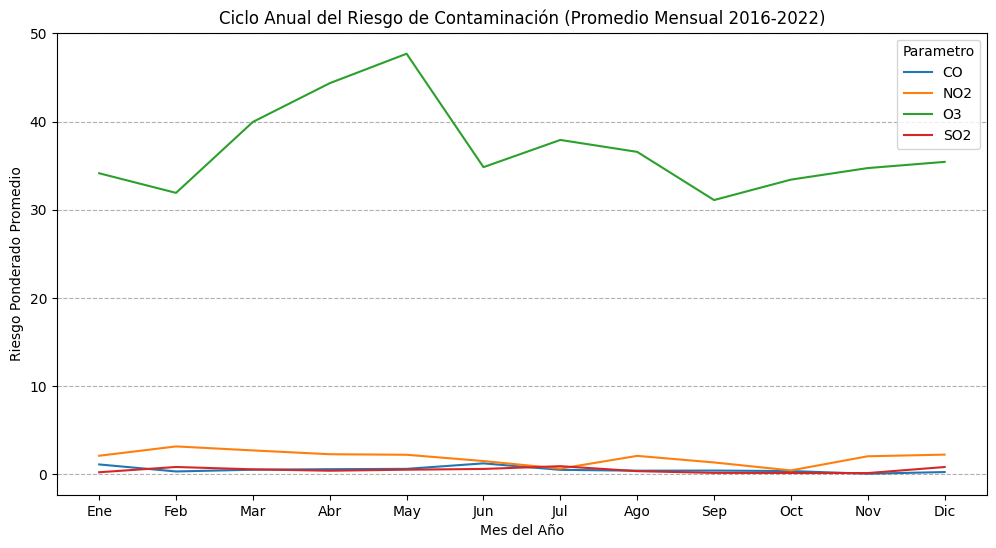

In [200]:
# --- PASO 1: PREPARACIÓN DE DATOS MENSUALES ---

# Extraemos el número del mes (1=Enero, 12=Diciembre)
df_analisis['Mes'] = df_analisis['Fecha inicial'].dt.month

# Agrupamos el riesgo (media) por mes y contaminante
# Usamos la MEDIA del Riesgo Ponderado para comparar el impacto típico de cada mes.
df_estacional = df_analisis.groupby(['Mes', 'Parametro'])['Riesgo Ponderado'].mean().reset_index()


# --- PASO 2: VISUALIZACIÓN ---

# Gráfico de líneas (usando Seaborn) para ver el ciclo anual
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=df_estacional,
    x='Mes',
    y='Riesgo Ponderado',
    hue='Parametro',
    dashes=False
)
plt.title('Ciclo Anual del Riesgo de Contaminación (Promedio Mensual 2016-2022)')
plt.xlabel('Mes del Año')
plt.ylabel('Riesgo Ponderado Promedio')
# Configuramos las etiquetas del eje X para que sean los nombres de los meses
plt.xticks(ticks=range(1, 13), labels=['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.grid(axis='y', linestyle='--')
plt.show()

## 6. Integración de Hallazgos y Análisis Avanzado 
### QUÉ Contamina: El contaminante dominante, con mayor Riesgo Ponderado, es el Ozono ($\text{O}_3$).
### DÓNDE Ocurre: El punto caliente es la estación VEL (Velódromo).
### CUÁNDO Ocurre: El riesgo se dispara en la temporada de calor y sequía (de Marzo a Mayo).

## Análisis Específico: ¿Ha Empeorado la "Temporada de Ozono" con el Tiempo?
#### Este análisis combina la variable temporal (Año) con la estacional (Mes) y se centra solo en el contaminante dominante ($\text{O}_3$).Objetivo: Mostrar si los picos de $\text{O}_3$ en Marzo-Mayo son más altos en los últimos años (2020-2022) comparados con los iniciales (2016-2018).

# Código: Tendencia de $\text{O}_3$ en los Meses Críticos

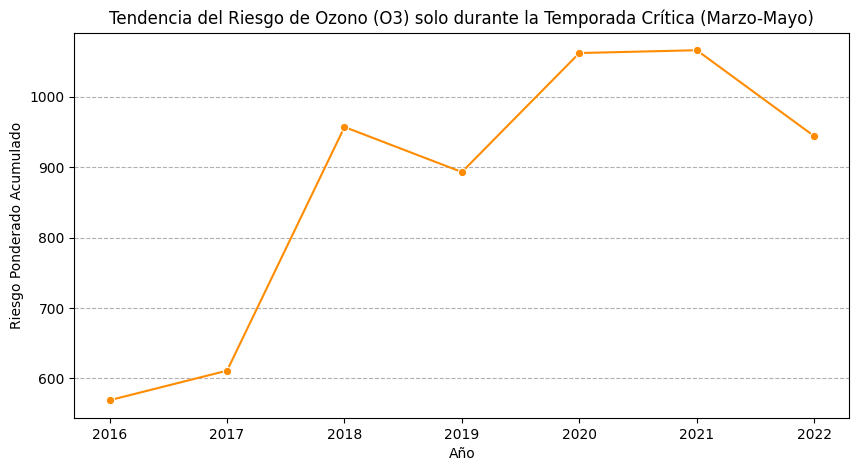

In [201]:
# 1. Filtrar el DataFrame para incluir solo el Ozono (O3) y los meses críticos (Marzo a Mayo)
df_o3 = df_analisis[df_analisis['Parametro'] == 'O3'].copy()
meses_criticos = [3, 4, 5] # Marzo, Abril, Mayo
df_pico_o3 = df_o3[df_o3['Mes'].isin(meses_criticos)]

# 2. Agrupar la suma del 'Riesgo Ponderado' por Año
df_pico_tendencia = df_pico_o3.groupby(df_pico_o3['Fecha inicial'].dt.year)['Riesgo Ponderado'].sum().reset_index()
df_pico_tendencia.columns = ['Año', 'Riesgo O3 Acumulado (Marzo-Mayo)']

# 3. Visualización de la tendencia del pico (con Matplotlib/Seaborn)
plt.figure(figsize=(10, 5))
sns.lineplot(
    data=df_pico_tendencia,
    x='Año',
    y='Riesgo O3 Acumulado (Marzo-Mayo)',
    marker='o', # Puntos en cada año para claridad
    color='darkorange'
)
plt.title('Tendencia del Riesgo de Ozono (O3) solo durante la Temporada Crítica (Marzo-Mayo)')
plt.xlabel('Año')
plt.ylabel('Riesgo Ponderado Acumulado')
plt.grid(axis='y', linestyle='--')
plt.show()

#### 1. El Contaminante Dominante es el Ozono ($\text{O}_3$)
##### El $\text{O}_3$ es el contaminante que consistentemente genera el mayor Riesgo Ponderado Acumulado en Puebla en todo el periodo 2016-2022, superando significativamente a $\text{NO}_2$, $\text{CO}$ y $\text{SO}_2$.
#### 2. El Riesgo se Agudiza Geográfica y Temporalmente
##### Punto Caliente (Hotspot): La estación VEL (Velódromo) registra el mayor número de Días Malos por Ozono, identificándola como una zona prioritaria de acción.Pico Estacional: El riesgo de $\text{O}_3$ es un fenómeno estacional bien definido, alcanzando su punto máximo en los meses de sequía y calor intenso: Marzo, Abril y Mayo.
#### 3. La Tendencia del Riesgo es Alarmante
##### El hallazgo más crítico es la tendencia al alza del riesgo de $\text{O}_3$ en su temporada crítica.El aumento drástico entre 2018 y 2021 sugiere que los factores que promueven la formación de Ozono (emisiones de precursores, tráfico, y/o condiciones meteorológicas) se intensificaron en esos años.El ligero descenso en 2022 podría indicar el inicio de una mejora (quizás debido a regulaciones, cambios en la movilidad post-pandemia o factores meteorológicos), pero la tendencia general 2016-2021 es de deterioro.

($\text{PM}{10}$ y $\text{PM}_{2.5}$), Dióxido de Azufre ($\text{SO}_2$), Monóxido de Carbono ($\text{CO}$), y Óxidos de Nitrógeno ($\text{NO}_x$).





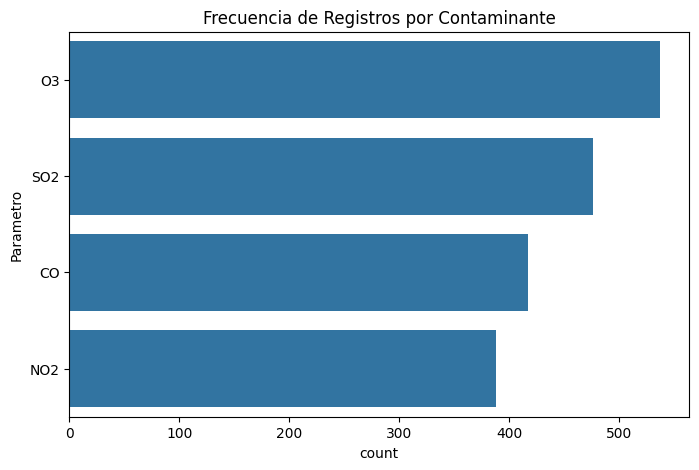

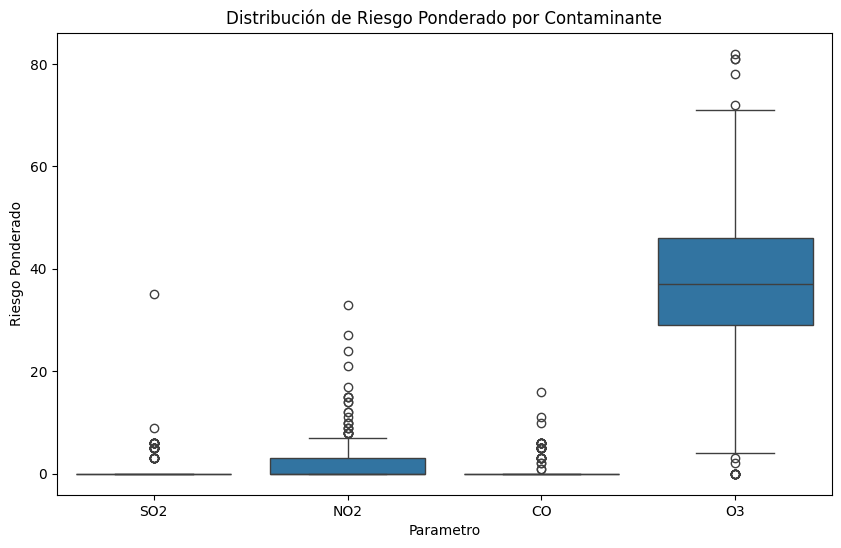

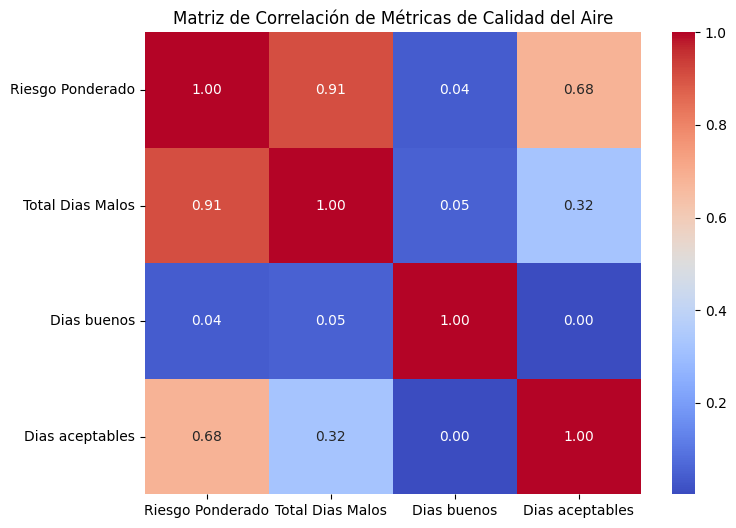

In [202]:
# | **Tipos de Variables** | Identificar los tipos de datos principales. | ```python

df_analisis.dtypes

# Texto: "Las variables son: Categóricas (`Estacion`, `Parametro`), de Fecha (`Fecha inicial`, `Fecha final`), y Numéricas (conteo de días, `Riesgo Ponderado`)."

# | **Resumen Estadístico** | Mostrar la dispersión de las métricas clave. | ```python
# Resumen estadístico de las métricas de riesgo
df_analisis[['Riesgo Ponderado', 'Total Dias Malos']].describe()
# Texto: "La media del Riesgo Ponderado es baja, pero el valor máximo (max) de [X] indica la presencia de eventos de riesgo extremo, que son el foco del análisis."


### 2. Visualización y Distribución

# Análisis de la Frecuencia Categórica (Contaminantes):**

plt.figure(figsize=(8, 5))
sns.countplot(y='Parametro', data=df_analisis, order=df_analisis['Parametro'].value_counts().index)
plt.title('Frecuencia de Registros por Contaminante')
plt.show()
    # Texto: "La frecuencia de registros es homogénea por contaminante, pero el análisis de la distribución de 'Riesgo Ponderado' (siguiente punto) muestra un desequilibrio hacia O3."

# Identificación de Outliers y Asimetría (Boxplots):**

plt.figure(figsize=(10, 6))
sns.boxplot(x='Parametro', y='Riesgo Ponderado', data=df_analisis)
plt.title('Distribución de Riesgo Ponderado por Contaminante')
plt.show()
# Texto: "El boxplot de 'Riesgo Ponderado' confirma que O3 no solo tiene la mediana más alta, sino también la mayor dispersión y los outliers más extremos, lo que justifica la priorización de O3."
    

### 3. Correlación entre Variables

# Dado que tus datos son de conteo agregado, la matriz de correlación se centrará en las métricas de riesgo.

# Calcular correlación solo entre métricas numéricas
df_corr = df_analisis[['Riesgo Ponderado', 'Total Dias Malos', 'Dias buenos', 'Dias aceptables']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(df_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación de Métricas de Calidad del Aire')
plt.show()
# Texto: "Se observa una correlación muy alta (cercana a 1) entre 'Riesgo Ponderado' y 'Total Días Malos', lo cual es esperado, ya que ambas miden el impacto negativo de la contaminación. Esto valida que cualquiera de las dos métricas es adecuada como variable objetivo."

#### 1. Boxplot del Riesgo Ponderado por ContaminanteEste gráfico será la prueba visual de que el Ozono ($\text{O}_3$) domina el riesgo, tal como lo discutimos.Objetivo: Comparar la media, dispersión, y rango de riesgo entre $\text{O}_3$, $\text{NO}_2$, $\text{CO}$, y $\text{SO}_2$.

C:\Users\dilon\AppData\Local\Temp\ipykernel_15532\2496193867.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




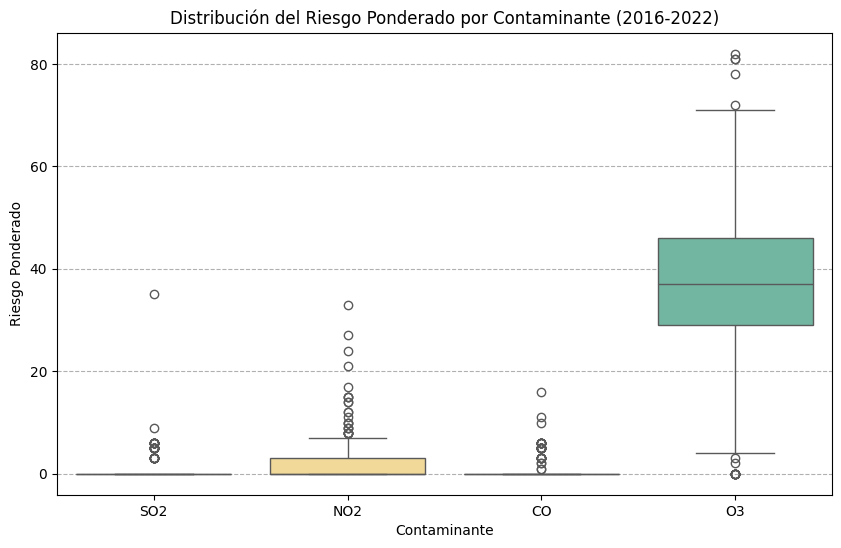

In [203]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Parametro', y='Riesgo Ponderado', data=df_analisis, palette='Spectral')
plt.title('Distribución del Riesgo Ponderado por Contaminante (2016-2022)')
plt.xlabel('Contaminante')
plt.ylabel('Riesgo Ponderado')
plt.grid(axis='y', linestyle='--')
plt.show()

### Interpretación Clave: "El Boxplot demuestra que la caja y la mediana del $\text{O}_3$ están significativamente más altas que las de otros contaminantes, y presenta la mayor cantidad de puntos atípicos (outliers), lo que confirma que el Ozono es la fuente de riesgo dominante y más variable."

## En datos ambientales, los outliers no son errores, son eventos de interés.

## Modelo de Machine Learning

### Sección 4: Modelo de Machine Learning (Clasificación de Riesgo)

En esta sección documentaremos un modelo de clasificación que puede ayudar a las autoridades a anticipar los meses con mayor probabilidad de ser "Críticos" por Ozono.

### Objetivo: Predecir si un mes (o periodo) entrará en la categoría de "Riesgo de Ozono Crítico" (Clase 1) o "Riesgo de Ozono No Crítico" (Clase 0).

#### Descripción del Modelo y Justificación
#### Nombre del Modelo: Clasificador de Bosque Aleatorio (Random Forest Classifier)
#### Tipo de Problema: Clasificación Supervisada
#### Variable Objetivo ($y$): Variable binaria Riesgo_Critico (1 = Riesgo Alto, 0 = Riesgo Bajo).
#### Justificación: Elegimos un modelo de clasificación porque la variable objetivo es categórica/binaria.
#### Interpretabilidad (Logística): Permite ver cómo el Mes y la Estacion influyen en la probabilidad de que un periodo sea crítico, lo cual es útil para la toma de decisiones.

2. Implementación (Esquema de Clasificación)

In [204]:
# 1. Creamos el Riesgo Mensual Agregado (solo para O3, nuestro foco)
df_mensual_o3 = df_analisis[df_analisis['Parametro'] == 'O3'].groupby(['Estacion', df_analisis['Fecha inicial'].dt.to_period('M')])['Riesgo Ponderado'].sum().reset_index()


# 2. Creamos la variable objetivo (binaria)
# Definimos "Crítico" como un mes cuyo riesgo de O3 está por encima del cuartil superior (Q3) de la distribución histórica.
Q3 = df_mensual_o3['Riesgo Ponderado'].quantile(0.75)
df_mensual_o3['Riesgo_Critico'] = np.where(df_mensual_o3['Riesgo Ponderado'] > Q3, 1, 0)

Variables a Usar (X): Mes, Estacion (codificadas con pd.get_dummies). Variable Objetivo (y): Riesgo_Critico.

3. Resultados y Evaluación
Métrica Clave: F1-Score y Matriz de Confusión.

Interpretación: "El modelo de clasificación [Nombre del Modelo] se entrenó para predecir meses de riesgo crítico de Ozono. Aunque el accuracy puede ser alto debido al desbalance de clases, el F1-Score nos da una medida más confiable de la capacidad del modelo para identificar correctamente un evento de alto riesgo (Verdaderos Positivos)."

Umbral de Riesgo Crítico (Q3): 61.5
Distribución de la variable objetivo:
Riesgo_Critico
0    299
1    100
Name: count, dtype: int64
--------------------------------------------------

--- EVALUACIÓN DEL CLASIFICADOR ---
Precisión (Accuracy): 0.625

Reporte de Clasificación (Clase 1 = Riesgo Crítico):
              precision    recall  f1-score   support

           0       0.72      0.80      0.76        59
           1       0.20      0.14      0.17        21

    accuracy                           0.62        80
   macro avg       0.46      0.47      0.46        80
weighted avg       0.59      0.62      0.60        80



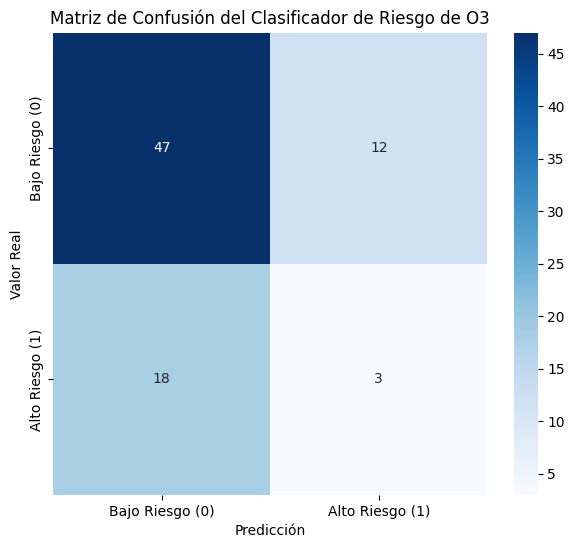

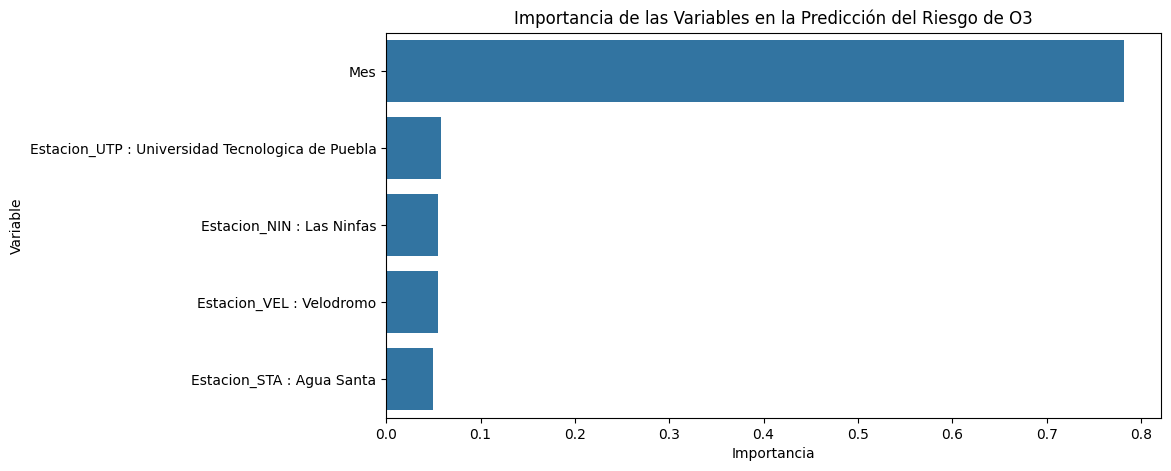


Variables más influyentes en el modelo:
Mes                                                 0.782305
Estacion_UTP : Universidad Tecnologica de Puebla    0.057915
Estacion_NIN : Las Ninfas                           0.055467
Estacion_VEL : Velodromo                            0.054698
Estacion_STA : Agua Santa                           0.049615
dtype: float64


In [205]:

# --- 1. CREACIÓN DE LA VARIABLE OBJETIVO BINARIA (Riesgo Crítico)

# 1. Nos centramos solo en el contaminante dominante (O3)

df_o3 = df_analisis[df_analisis['Parametro'] == 'O3'].copy()

# 2. Agregación mensual del riesgo total de O3 por estación
# Agrupamos por Estación y Mes para obtener una fila por mes/estación
df_mensual_o3 = df_o3.groupby(
    ['Estacion', df_o3['Fecha inicial'].dt.to_period('M')]
)['Riesgo Ponderado'].sum().reset_index()


# Extraer el mes como columna numérica
df_mensual_o3['Mes'] = df_mensual_o3['Fecha inicial'].dt.month



# 3. Definición de Riesgo Crítico (Clase 1)
# Calculamos el Cuartil 3 (Q3) del riesgo histórico de O3 para usarlo como umbral.
Q3 = df_mensual_o3['Riesgo Ponderado'].quantile(0.75)



# Crear la variable binaria: 1 si el riesgo está por encima del Q3, 0 si está por debajo.
df_mensual_o3['Riesgo_Critico'] = np.where(df_mensual_o3['Riesgo Ponderado'] > Q3, 1, 0)

print("Umbral de Riesgo Crítico (Q3):", Q3)
print("Distribución de la variable objetivo:")
print(df_mensual_o3['Riesgo_Critico'].value_counts())
print("-" * 50)

# 2. PREPARACIÓN DE X (PREDICTORAS) y Y (OBJETIVO)

# X: Variables predictoras ('Estacion' y 'Mes')
# Usamos pd.get_dummies para codificar la variable categórica 'Estacion'
X = pd.get_dummies(df_mensual_o3[['Estacion', 'Mes']], columns=['Estacion'], drop_first=True)

# y: Variable objetivo (Riesgo Crítico)
y = df_mensual_o3['Riesgo_Critico']

# Convertir columnas de booleanos (creadas por get_dummies) a enteros (1 o 0)
X = X.astype(int)


# 3. DIVISIÓN DE DATOS Y ENTRENAMIENTO DEL MODELO

# División de datos (80% entrenamiento, 20% prueba)
# Esta función define X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicialización y Entrenamiento del modelo Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predicción
y_pred = model.predict(X_test)


# 4. RESULTADOS Y EVALUACIÓN

print("\n--- EVALUACIÓN DEL CLASIFICADOR ---")

print("Precisión (Accuracy):", accuracy_score(y_test, y_pred))

print("\nReporte de Clasificación (Clase 1 = Riesgo Crítico):")
print(classification_report(y_test, y_pred))

# Visualización de la Matriz de Confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Bajo Riesgo (0)', 'Alto Riesgo (1)'],
            yticklabels=['Bajo Riesgo (0)', 'Alto Riesgo (1)'])
plt.title("Matriz de Confusión del Clasificador de Riesgo de O3")
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.show()

# Importancia de las Variables (Feature Importance)
# Esto es crucial para tu reporte (Sección 4.5.2)
feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title('Importancia de las Variables en la Predicción del Riesgo de O3')
plt.xlabel('Importancia')
plt.ylabel('Variable')
plt.show()

print("\nVariables más influyentes en el modelo:")
print(feature_importances)

In [206]:
# Calcula el resumen estadístico completo de la métrica de riesgo
# El resultado incluye: count, mean, std, min, 25%, 50% (mediana), 75%, max
resumen_estadistico = df_analisis['Riesgo Ponderado'].describe()

# Para presentarlo en un formato de tabla claro en el notebook
print(resumen_estadistico.to_frame())

       Riesgo Ponderado
count       1818.000000
mean          11.564906
std           18.439251
min            0.000000
25%            0.000000
50%            0.000000
75%           23.000000
max           82.000000


In [207]:
# Muestra el resumen estadístico de la métrica clave
df_analisis['Riesgo Ponderado'].describe().to_frame()

,Riesgo Ponderado
count,1818.000000
mean,11.564906
std,18.439251
min,0.000000
25%,0.000000
50%,0.000000
75%,23.000000
max,82.000000
